In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

candels = pickle.load(open('delz_candels.pkl','rb'))

In [3]:
EGS11Coo = candels[-28]

delz = EGS11Coo[0]
nearby = EGS11Coo[1][1]
host = EGS11Coo[1][2]
lc = EGS11Coo[1][3]




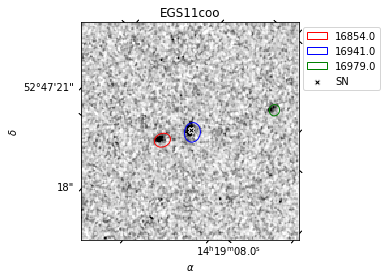

In [4]:

nick = EGS11Coo[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(EGS11Coo[1][0]['RA'],EGS11Coo[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.009,val_max = .019 )


In [14]:
import numpy as np
np.set_printoptions(threshold=np.inf)
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names,nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]])

1 ID,12 zbest,9 zspec,8 zphot,15 zphot_l95,16 zphot_u95
float64,float64,float64,float64,float64,float64
16854.0,1.688,-99.0,1.688,1.11,2.41
16941.0,1.275,-99.0,1.275,0.25,1.49
16979.0,1.253,-99.0,1.253,0.21,2.98


In [7]:
EGS11Coo[1][0]

name,nickname,col2,decliner,REPROC,RA,DEC,Host RA,Host DEC,zSN,dzSN,zHost,dzHost,Host Morphology,Host SED Type,PIaz,dPIaz,PIaHost,dPIaHost,galsnidShift,zSNold,dzSNold,zSN Source,zHost Source
str9,str12,str1,str1,str1,str12,str13,str12,str13,str5,str6,str8,str7,str7,str7,str4,str11,str4,str11,str5,str6,str6,str23,str47
EGS11coo,Coolidge,A,1,o,14:19:07.703,52:47:15.85,14:19:07.703,52:47:15.91,1.790,0.5,1.79,0.5,,,0.5,,,,,,,,


## Don't see this SN published anywhere

## ## it is provided as zSN ~ 1.79 +-- 0.5 

## It seems like it has a clear host coincident with the SN location, the image in mosaic looks like a galaxy not just SN

## in my catalog coincident has zpeak ~ 1.275 ~ [0.25,1.49]... ie huge photz uncertainty 

## current best guess available provided see evernote description below

## 'Here is a possible host, but it is 1.5 arcsec away? host zphot ~ 1.79 ~ [1.23,2.23] and dra 1.27, ddec 0.86

## this would probably be referring to my catalogs obj 16854 (slightly off from SN loc) which has zphot ~ 1.69 ~ [1.11,2.41]

## A little strange since the table provided has host ra/dec coincident with sn loc; but this is never actually explicitly mentioned? Maybe it isn't actually a galaxy?

## Also in the evernote SN phot data ~  '(NOTE: these are consistent with a SNIa at peak, near z=1.5)'

## Need to know if that coincident is a galaxy. If so the host photz from my catalog isn't great but maybe try that again as prior for stardust... it does get near that above mentioned z ~ 1.5

## Is there more available on this SN was it determined to be AGN?